# ***Mount Drive***

In [1]:
# Mount!
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Load Libraries***

In [2]:
# Import some mainstream Library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 

from scipy import stats
from numpy import hstack 
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# ***Determine Open/Save Directory***

In [3]:
# Determine the Path and Retrieve the Data
pathDatasets = '/content/drive/My Drive/Colab/Projects - Niagahoster/Datasets/' #Getting Datasets
pathResults = '/content/drive/My Drive/Colab/Projects - Niagahoster/Results/' #Saving Excel, Image, etc

SalesData = pd.read_csv(pathDatasets + 'NH_Technical_Test.csv')
SalesData.tail()

,client_id,invoice_id,invoice_item_id,invoice_status,service_status,product_id,monthly_price_usd,discount,service_period,client_task,invoice_created_at,invoice_paid_at,service_cancelled_at,monthly_period,total_price,discounted_price
89540,259942,881975.0,884574,Paid,Active,3,13,0.50,1Y,Activate,2019-12-16T06:14:36Z,2019-12-18T06:21:09Z,NaN,12,156,78.00
89541,84615,882013.0,1070069,Paid,Active,3,13,0.50,1Y,Renew,2019-12-16T07:00:45Z,2019-12-20T03:20:26Z,NaN,12,156,78.00
89542,129895,882042.0,1155193,Paid,Active,4,18,0.37,1Y,Renew,2019-12-16T07:24:39Z,2019-12-16T10:04:59Z,NaN,12,216,136.08
89543,259997,882147.0,952162,Paid,Active,3,13,0.75,3Y,Activate,2019-12-16T09:17:21Z,2019-12-16T09:20:06Z,NaN,36,468,117.00
89544,251782,882187.0,920682,Paid,Active,3,13,0.78,3Y,Activate,2019-12-16T10:23:09Z,2019-12-16T10:26:42Z,NaN,36,468,102.96


# ***A bit of Exploration and Pre-Process***

In [4]:
# Exploring Count of Distinct Value and Total Value
cntDistinct = SalesData.nunique() #Count distict values
cntCount = SalesData.count() #Count only non-null values
cntDistinct = pd.DataFrame(data=cntDistinct)
cntCount = pd.DataFrame(data=cntCount)
cntDistinct['col'], cntCount['col']= cntDistinct.index, cntCount.index

cntMerge = [cntDistinct, cntCount]
cntMerge = reduce(lambda left,right: pd.merge(left,right,on='col',how='left'), cntMerge)
cntMerge = cntMerge[['col', '0_x', '0_y']]
cntMerge.columns = ['col', 'distinct', 'count']
cntMerge

,col,distinct,count
0,client_id,56211,89545
1,invoice_id,85681,89545
2,invoice_item_id,88890,89545
3,invoice_status,4,89545
4,service_status,5,89545
5,product_id,14,89545
6,monthly_price_usd,14,89545
7,discount,224,89545
8,service_period,6,89545
9,client_task,2,89545


In [5]:
# Exploring the Original Data Type of Dataframe
SalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89545 entries, 0 to 89544
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   client_id             89545 non-null  int64  
 1   invoice_id            89545 non-null  float64
 2   invoice_item_id       89545 non-null  int64  
 3   invoice_status        89545 non-null  object 
 4   service_status        89545 non-null  object 
 5   product_id            89545 non-null  int64  
 6   monthly_price_usd     89545 non-null  int64  
 7   discount              89545 non-null  float64
 8   service_period        89545 non-null  object 
 9   client_task           89545 non-null  object 
 10  invoice_created_at    89545 non-null  object 
 11  invoice_paid_at       53755 non-null  object 
 12  service_cancelled_at  21756 non-null  object 
 13  monthly_period        89545 non-null  int64  
 14  total_price           89545 non-null  int64  
 15  discounted_price   

In [6]:
# Set the Right Data Type for the Wrong One
SalesData['client_id'] = SalesData['client_id'].astype('object')
SalesData['invoice_id'] = SalesData['invoice_id'].astype('object')
SalesData['invoice_item_id'] = SalesData['invoice_item_id'].astype('object')
SalesData['product_id'] = SalesData['product_id'].astype('object')
SalesData['monthly_price_usd'] = SalesData['monthly_price_usd'].astype('float64')
SalesData["invoice_created_at"] = pd.to_datetime(SalesData["invoice_created_at"], format="%Y-%m-%dT%H:%M:%SZ")
SalesData["invoice_paid_at"] = pd.to_datetime(SalesData["invoice_paid_at"], format="%Y-%m-%dT%H:%M:%SZ")
SalesData["service_cancelled_at"] = pd.to_datetime(SalesData["service_cancelled_at"], format="%Y-%m-%dT%H:%M:%SZ")
SalesData['total_price'] = SalesData['total_price'].astype('float64')
SalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89545 entries, 0 to 89544
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   client_id             89545 non-null  object        
 1   invoice_id            89545 non-null  object        
 2   invoice_item_id       89545 non-null  object        
 3   invoice_status        89545 non-null  object        
 4   service_status        89545 non-null  object        
 5   product_id            89545 non-null  object        
 6   monthly_price_usd     89545 non-null  float64       
 7   discount              89545 non-null  float64       
 8   service_period        89545 non-null  object        
 9   client_task           89545 non-null  object        
 10  invoice_created_at    89545 non-null  datetime64[ns]
 11  invoice_paid_at       53755 non-null  datetime64[ns]
 12  service_cancelled_at  21756 non-null  datetime64[ns]
 13  monthly_period  

# ***Question A***
Imagine you are working as a data analyst working at company "X". You were asked to make an annual report by the product manager. In order to do that, you need data which you might already have right now. However, you were informed by the data engineer that there was a problem recently in the company's database. As a result, some records are believed to be duplicated and this would create a huge amount of error in your report.  As a data analyst, it is also part of your job to do some data cleaning. Therefore, separate all the duplicated records, count how many of them, and remove them completely from your data so that you can feel confident about the validity of your analysis.

In [7]:
# Get to know the Duplicate: Based on invoice_id & product_id that have same value
SalesDataDuplicate = SalesData[SalesData.duplicated(['invoice_id', 'product_id'])]
SalesDataDuplicate.tail()

,client_id,invoice_id,invoice_item_id,invoice_status,service_status,product_id,monthly_price_usd,discount,service_period,client_task,invoice_created_at,invoice_paid_at,service_cancelled_at,monthly_period,total_price,discounted_price
89540,259942,881975,884574,Paid,Active,3,13.0,0.50,1Y,Activate,2019-12-16 06:14:36,2019-12-18 06:21:09,NaT,12,156.0,78.00
89541,84615,882013,1070069,Paid,Active,3,13.0,0.50,1Y,Renew,2019-12-16 07:00:45,2019-12-20 03:20:26,NaT,12,156.0,78.00
89542,129895,882042,1155193,Paid,Active,4,18.0,0.37,1Y,Renew,2019-12-16 07:24:39,2019-12-16 10:04:59,NaT,12,216.0,136.08
89543,259997,882147,952162,Paid,Active,3,13.0,0.75,3Y,Activate,2019-12-16 09:17:21,2019-12-16 09:20:06,NaT,36,468.0,117.00
89544,251782,882187,920682,Paid,Active,3,13.0,0.78,3Y,Activate,2019-12-16 10:23:09,2019-12-16 10:26:42,NaT,36,468.0,102.96


In [8]:
# Sampling to getting to know the Duplicate, Except First Row
SalesDataDuplicate.loc[SalesDataDuplicate['invoice_id'] == 879438.0] #3
SalesData.loc[SalesData['invoice_id'] == 879438.0] #4

,client_id,invoice_id,invoice_item_id,invoice_status,service_status,product_id,monthly_price_usd,discount,service_period,client_task,invoice_created_at,invoice_paid_at,service_cancelled_at,monthly_period,total_price,discounted_price
128,247837,879438,960520,Paid,Active,3,13.0,0.78,3Y,Activate,2019-12-13 11:55:39,2019-12-13 11:58:23,NaT,36,468.0,102.96
515,247837,879438,988495,Paid,Cancelled,3,13.0,0.75,3Y,Activate,2019-12-13 11:55:39,2019-12-13 11:58:23,NaT,36,468.0,117.00
51552,247837,879438,1229821,Paid,Active,3,13.0,0.78,3Y,Activate,2019-12-13 11:55:39,2019-12-13 11:58:23,NaT,36,468.0,102.96
51553,247837,879438,1229822,Paid,Cancelled,3,13.0,0.75,3Y,Activate,2019-12-13 11:55:39,2019-12-13 11:58:23,NaT,36,468.0,117.00


In [9]:
# Start Cleaning
SalesDataClean = SalesData.drop(list(list(SalesDataDuplicate.index)))
SalesDataClean.tail()

,client_id,invoice_id,invoice_item_id,invoice_status,service_status,product_id,monthly_price_usd,discount,service_period,client_task,invoice_created_at,invoice_paid_at,service_cancelled_at,monthly_period,total_price,discounted_price
88217,167962,882294,1234042,Unpaid,Pending Setup,1,6.0,0.29,1Y,Activate,2019-12-16 15:50:32,NaT,NaT,12,72.0,51.12
88218,154829,882303,1234057,Unpaid,Pending Setup,4,18.0,0.42,1Y,Activate,2019-12-16 16:17:52,NaT,NaT,12,216.0,125.28
88219,260103,882308,1234065,Unpaid,Pending Setup,1,6.0,0.32,1Y,Activate,2019-12-16 16:30:42,NaT,NaT,12,72.0,48.96
88220,123628,882310,1234067,Unpaid,Active,2,9.0,0.31,1Y,Activate,2019-12-16 16:36:42,NaT,NaT,12,108.0,74.52
88221,167962,882312,1234070,Unpaid,Pending Setup,1,6.0,0.29,1Y,Activate,2019-12-16 16:42:36,NaT,NaT,12,72.0,51.12


In [10]:
# Conclusion in Number
print("So, \nThe number of Records in Raw Sales Data: " + str(len(SalesData))
      + "\nThe number of Records in Duplicated Sales Data: " + str(len(SalesDataDuplicate))
      + "\nThe number of Records in Cleaned Sales Data: " + str(len(SalesDataClean)))

So, 
The number of Records in Raw Sales Data: 89545
The number of Records in Duplicated Sales Data: 3718
The number of Records in Cleaned Sales Data: 85827


# ***Question B***
What's the total number of sales along with the total revenue shared from each product? <br> Arrange the result by the total revenue in descending order.

In [11]:
# Status Exploration
print(SalesData.invoice_status.unique())
print(SalesData.service_status.unique())

['Paid' 'Refunded' 'Cancelled' 'Unpaid']
['Active' 'Suspended' 'Cancelled' 'Failed Setup' 'Pending Setup']


After Cleaning the Duplicate in Question A.
For Question B up to Question F we need to eliminate All the Records with:
1. Invoice_status 'Refunded', 'Cancelled', 'Unpaid'. Because we can't do sales analysis if the customer itself has not bought a Product
2. Invoice_paid_at is NULL, Because paid supposed to be have its datetime.
3. Rows with invoice_paid_at before invoice_created_at, Because doesn't make sense.

In [12]:
# Start eliminating those who are not in 'invoice_paid_at' invoice_status AND have 'null' paid_at
SalesDataCleanPaid = SalesDataClean.loc[SalesDataClean['invoice_status'] == 'Paid'] #Select Only Paid
SalesDataCleanPaid = SalesDataCleanPaid.dropna(axis=0, subset=['invoice_paid_at']) #Drop Null invoice_paid_at
SalesDataCleanPaid = SalesDataCleanPaid[SalesDataCleanPaid['invoice_created_at'] < SalesDataCleanPaid['invoice_paid_at']]
SalesDataCleanPaid.tail()

,client_id,invoice_id,invoice_item_id,invoice_status,service_status,product_id,monthly_price_usd,discount,service_period,client_task,invoice_created_at,invoice_paid_at,service_cancelled_at,monthly_period,total_price,discounted_price
52421,238846,861162,1202038,Paid,Active,9,17.0,0.00,1M,Renew,2019-11-26 17:00:41,2019-12-31 01:03:39,NaT,1,17.0,17.00
52423,74461,876940,1225832,Paid,Active,3,13.0,0.50,3Y,Renew,2019-12-11 00:00:41,2019-12-31 02:57:17,NaT,36,468.0,234.00
52426,15425,880099,1230653,Paid,Active,3,13.0,0.50,1Y,Renew,2019-12-13 22:12:57,2019-12-31 09:03:16,NaT,12,156.0,78.00
52427,50642,877841,1227281,Paid,Active,3,13.0,0.50,1Y,Renew,2019-12-11 20:24:53,2019-12-31 09:37:55,NaT,12,156.0,78.00
52429,69925,881656,1232953,Paid,Active,12,49.0,0.11,1M,Renew,2019-12-15 20:12:53,2019-12-31 10:45:22,NaT,1,49.0,43.61


In [13]:
SalesDataCleanPaid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49804 entries, 0 to 52429
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   client_id             49804 non-null  object        
 1   invoice_id            49804 non-null  object        
 2   invoice_item_id       49804 non-null  object        
 3   invoice_status        49804 non-null  object        
 4   service_status        49804 non-null  object        
 5   product_id            49804 non-null  object        
 6   monthly_price_usd     49804 non-null  float64       
 7   discount              49804 non-null  float64       
 8   service_period        49804 non-null  object        
 9   client_task           49804 non-null  object        
 10  invoice_created_at    49804 non-null  datetime64[ns]
 11  invoice_paid_at       49804 non-null  datetime64[ns]
 12  service_cancelled_at  2969 non-null   datetime64[ns]
 13  monthly_period  

In [14]:
# Start count total number of sales along with the total revenue per Product_ID
cntSalesRevenue = SalesDataCleanPaid.groupby('product_id').agg({'invoice_id':'count', 'discounted_price': 'sum'}).reset_index()
cntSalesRevenue.columns = ['product_id', 'countSales', 'sumRevenue']
cntSalesRevenue = cntSalesRevenue.sort_values('sumRevenue', ascending=False).reset_index(drop=True)
cntSalesRevenue.index += 1
cntSalesRevenue

,product_id,countSales,sumRevenue
1,3,21818,1976580.84
2,4,6213,855827.64
3,2,9265,673623.00
4,1,3627,188203.68
5,11,1583,186708.21
6,12,1009,142747.78
7,7,477,142460.80
8,14,558,140726.46
9,10,1302,94813.88
10,9,2574,92451.27


# ***Question C***
The company is planning to give free vouchers to its loyal customers at the end of the year. <br> How do you define "loyal" in this case and explain why? <br> List 100 customers who are eligible to get free vouchers based on your definition of "loyal".

In [15]:
# Start with RFM Analaysis. Loyal is always based on Recency, Frequency and Monetary

# ***Question D***
What's the average time duration for clients to complete their payments? <br> Hint: you may want to check the distribution of all those time durations to choose a correct central-tendency measure

In [16]:
# Count Duration in Days - Assume we gonna Round it Down
SalesDataCleanPaid['dur'] = (SalesDataCleanPaid['invoice_paid_at'] - SalesDataCleanPaid['invoice_created_at'])
SalesDataCleanPaid['dur_days'] = (SalesDataCleanPaid['invoice_paid_at'] - SalesDataCleanPaid['invoice_created_at']).astype('timedelta64[D]')
SalesDataCleanPaid['dur_days'] = SalesDataCleanPaid['dur_days'].astype('int64')

In [17]:
SalesDataCleanPaid

,client_id,invoice_id,invoice_item_id,invoice_status,service_status,product_id,monthly_price_usd,discount,service_period,client_task,invoice_created_at,invoice_paid_at,service_cancelled_at,monthly_period,total_price,discounted_price,dur,dur_days
0,9162,872143,1115707,Paid,Active,4,18.0,0.42,1Y,Renew,2019-12-05 22:36:44,2019-12-25 12:30:11,NaT,12,216.0,125.28,19 days 13:53:27,19
1,246708,875146,841327,Paid,Active,11,39.0,0.14,1M,Activate,2019-12-09 04:20:49,2019-12-09 04:25:11,NaT,1,39.0,33.54,0 days 00:04:22,0
2,52476,856128,1197628,Paid,Active,12,49.0,0.69,1M,Renew,2019-11-20 21:24:37,2019-12-03 23:33:27,NaT,1,49.0,15.19,13 days 02:08:50,13
3,129362,869645,1004638,Paid,Active,1,6.0,0.44,1Y,Renew,2019-12-04 00:37:05,2019-12-15 13:13:30,NaT,12,72.0,40.32,11 days 12:36:25,11
4,47277,843127,1184209,Paid,Active,3,13.0,0.34,1Y,Renew,2019-11-06 21:24:30,2019-12-04 03:37:11,NaT,12,156.0,102.96,27 days 06:12:41,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52421,238846,861162,1202038,Paid,Active,9,17.0,0.00,1M,Renew,2019-11-26 17:00:41,2019-12-31 01:03:39,NaT,1,17.0,17.00,34 days 08:02:58,34
52423,74461,876940,1225832,Paid,Active,3,13.0,0.50,3Y,Renew,2019-12-11 00:00:41,2019-12-31 02:57:17,NaT,36,468.0,234.00,20 days 02:56:36,20
52426,15425,880099,1230653,Paid,Active,3,13.0,0.50,1Y,Renew,2019-12-13 22:12:57,2019-12-31 09:03:16,NaT,12,156.0,78.00,17 days 10:50:19,17
52427,50642,877841,1227281,Paid,Active,3,13.0,0.50,1Y,Renew,2019-12-11 20:24:53,2019-12-31 09:37:55,NaT,12,156.0,78.00,19 days 13:13:02,19


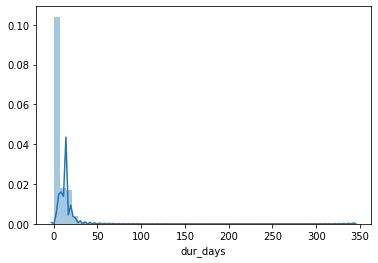

In [18]:
# Plotting to Know Central Tendency
plot = SalesDataCleanPaid['dur_days']
distplot = sns.distplot(plot)

In [19]:
# Central Tendency, Manual
print("Central Tendency"
      + "\nMean\t: " + str(SalesDataCleanPaid['dur_days'].mean())
      + "\nMedian\t: " + str(SalesDataCleanPaid['dur_days'].median())
      + "\nMode\t: " + str(float(SalesDataCleanPaid['dur_days'].mode())))

Central Tendency
Mean	: 5.1597662838326235
Median	: 0.0
Mode	: 0.0


In [20]:
# Central Tendency, Statistics Function
SalesDataCleanPaid['dur_days'].describe()

count    49804.000000
mean         5.159766
std         11.630292
min          0.000000
25%          0.000000
50%          0.000000
75%          9.000000
max        343.000000
Name: dur_days, dtype: float64

# ***Question E***
How would you segment the company's customers based on their purchase history? <br> While you are allowed to use your own intuition, you should always support your argument using the data available.

# ***Question F***
Explore the data. State your interesting findings as well as recommendation (if any) to the product team.